In [10]:
import scipy as sc
import numpy as np
import pandas as pd
import random

In [1]:
from matplotlib import pyplot as plt

q1 b first 


In [11]:
# setting the value of n and p
n = 20
p = 0.23
dist_b = [sc.stats.binom.pmf(r, n, p) for r in range(n+1)]

In [12]:
dist_b

[0.005368024674737596,
 0.032068718836094724,
 0.09100019565826885,
 0.16309125975118294,
 0.207041177151664,
 0.19789909919951268,
 0.14778179485677884,
 0.08828522809625762,
 0.042852732468800336,
 0.017066889121773288,
 0.005607692140011227,
 0.0015227499317621994,
 0.00034113553666101246,
 6.270623251311313e-05,
 9.36521654416624e-06,
 1.1189609377445386e-06,
 1.0444846415634899e-07,
 7.340915739025293e-09,
 3.654568441506096e-10,
 1.1490782522848984e-11,
 1.7161558313345875e-13]

<BarContainer object of 21 artists>

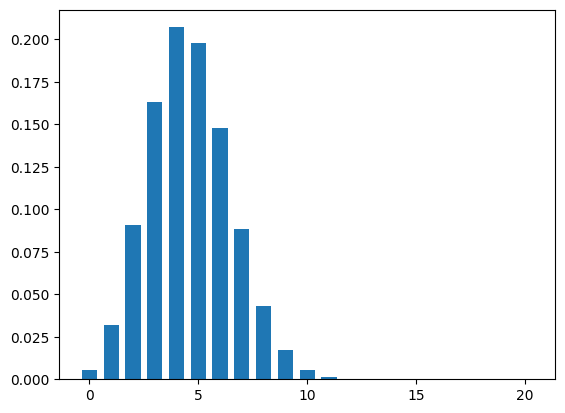

In [13]:
plt.bar(range(n+1), dist_b, width = 0.7)

In [14]:
mean, var = sc.stats.binom.stats(n,p)

In [15]:
mean

4.6000000000000005

In [16]:
var

3.5420000000000007

In [17]:
dist_p = [sc.stats.poisson.pmf(r, n*p) for r in range(n+1)]

<BarContainer object of 21 artists>

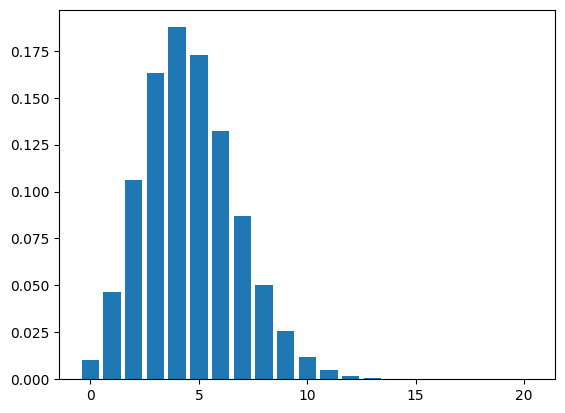

In [18]:
plt.bar(range(n+1), dist_p)

In [19]:
mean_p, var_p = sc.stats.poisson.stats(n*p)

In [20]:
mean_p

4.6000000000000005

In [21]:
var_p

4.6000000000000005

thus we can say mean is same but varriance differs alot

##Q1 b second ##


In [22]:
n = 300000
p = .000001

In [23]:
dist_b = pd.Series(sc.stats.binom.pmf(r,n,p) for r in range(n+1))

In [24]:
dist_b.describe()

count    300001.000000
mean          0.000003
std           0.001413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.740818
dtype: float64

lets see for poisson with lambda = n*p

In [25]:
lamba = n*p

In [26]:
dist_p = pd.Series(sc.stats.poisson.pmf(r, lamba) for r in range(n+1))

In [27]:
dist_p.describe()

count    300001.000000
mean          0.000003
std           0.001413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.740818
dtype: float64

now there is no difference between poisson and binomial when n tends to infinity and p tends to zero but n*p is a normal number

# Q4 #

In [30]:
data = {'x=2':2/27,
        'x=3':3/27,
        'x=1':1/27,
       'x=1':1/27,
       'x=7':7/27,
       'x=0':0/27,
       'x=4':4/27,
       'x=5':9/27}

# Create a DataFrame
df = pd.DataFrame(data, index = ['P(X) = x'])

In [31]:
df

,x=2,x=3,x=1,x=7,x=0,x=4,x=5
P(X) = x,0.074074,0.111111,0.037037,0.259259,0.0,0.148148,0.333333


now lets take random samples of size 10000 and calculate mean and varrience of them 10000 times each 

In [33]:
ListOfMeans = []
for i in range(10000):
    ListOfSamples = []
    for j in range(10000):
        sample = random.sample([2,3,1,1,7,0,4,5], 1)
        ListOfSamples.append(sample[0])
    ListOfMeans.append(pd.Series(ListOfSamples).mean())
    ListOfSamples = []

(array([  1.,   1.,   0.,   0.,   2.,   1.,   1.,   2.,   0.,   0.,   2.,
          3.,   5.,  12.,   7.,   8.,   9.,  14.,  15.,  20.,  22.,  24.,
         32.,  34.,  41.,  42.,  53.,  63.,  66.,  74.,  91., 107., 111.,
        124., 170., 145., 167., 189., 188., 217., 248., 216., 250., 281.,
        274., 299., 283., 293., 290., 273., 310., 336., 267., 289., 302.,
        273., 296., 256., 225., 265., 222., 212., 199., 213., 177., 159.,
        155., 125., 109., 120.,  88.,  89.,  85.,  69.,  58.,  44.,  43.,
         46.,  30.,  33.,  24.,  23.,  14.,  22.,   8.,   5.,   8.,   8.,
          4.,   4.,   6.,   2.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,
          1.]),
 array([2.7905  , 2.792166, 2.793832, 2.795498, 2.797164, 2.79883 ,
        2.800496, 2.802162, 2.803828, 2.805494, 2.80716 , 2.808826,
        2.810492, 2.812158, 2.813824, 2.81549 , 2.817156, 2.818822,
        2.820488, 2.822154, 2.82382 , 2.825486, 2.827152, 2.828818,
        2.830484, 2.83215 , 2.833816, 2.835482

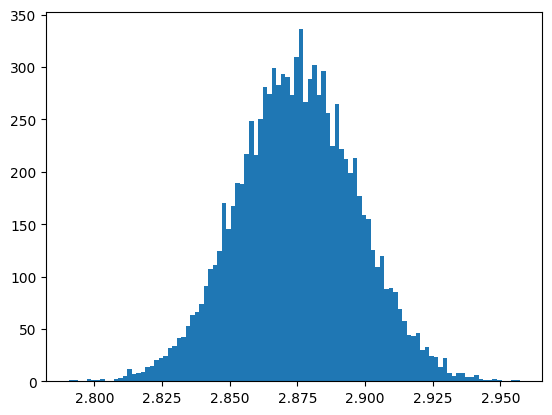

In [34]:
plt.hist(ListOfMeans, bins = 100)

resulted graph is nearly same as normal distribution 

In [35]:
mean1 = 4.52
stddev1 = 4.496

# Q6 #

In [37]:
from scipy.stats import binom


x_bar = 4.97
n = 10
p_null = 0.5
se = (p_null * (1 - p_null) / n)**0.5
z = (x_bar - p_null) / se
p_value = 2 * (1 - binom.cdf(int(x_bar), n, p_null))
print("Z-score:", z)
print("P-value:", p_value)
p_alt = 0.497
p_value_alt = 2 * (1 - binom.cdf(int(x_bar), n, p_alt))
print("P-value for p = 0.497:", p_value_alt)


Z-score: 28.27076228190531
P-value: 1.24609375
P-value for p = 0.497: 1.231284540041297
